# Part 2

In [23]:
library('igraph')
library('Matrix')
library('pracma')

## Question 3(a)

In [25]:
#creating the transition matrix of the graph
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

#Function for random walk
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

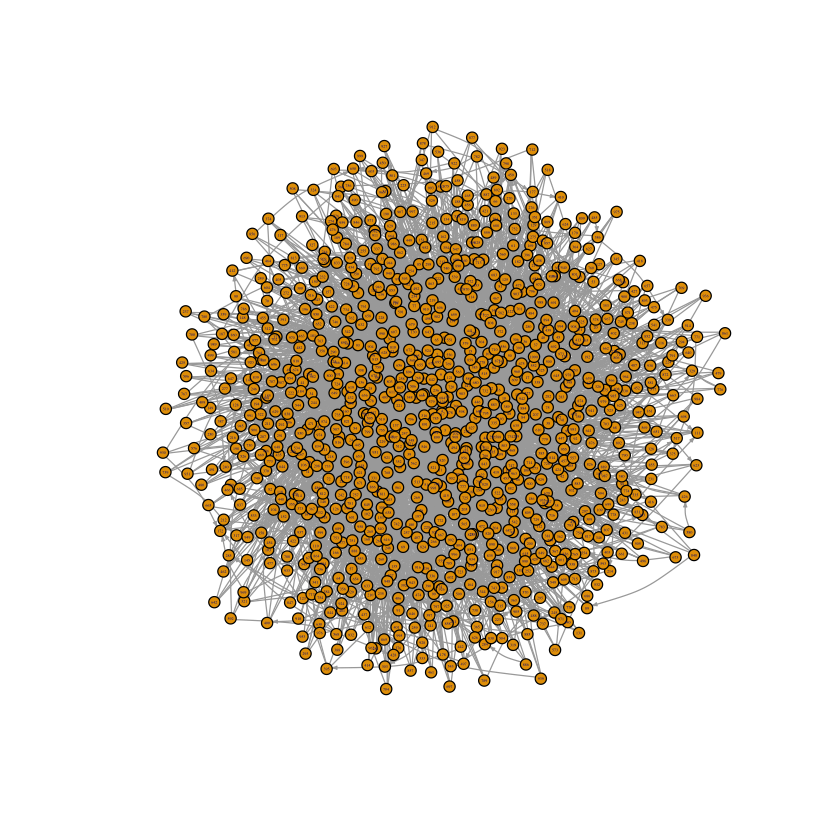

In [26]:
#create a pref attachment network

set.seed(1)
g = barabasi.game(1000, m = 4, directed = T)
plot(g, vertex.size = 4, vertex.label.cex = 0.2,edge.arrow.size=.2, edge.curved=0.2)


In [27]:
steady_state_node = c()


for(i in sample.int(1000, size = 250)){
v_last = random_walk(g,20,i)
steady_state_node = c(steady_state_node, v_last)
}
print(steady_state_node)

  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


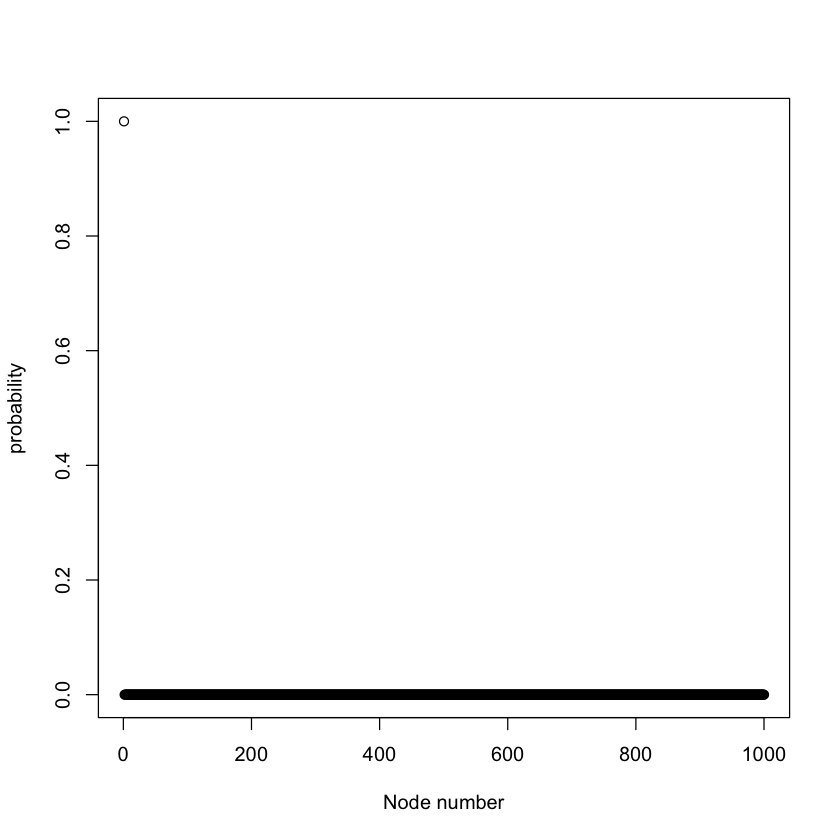

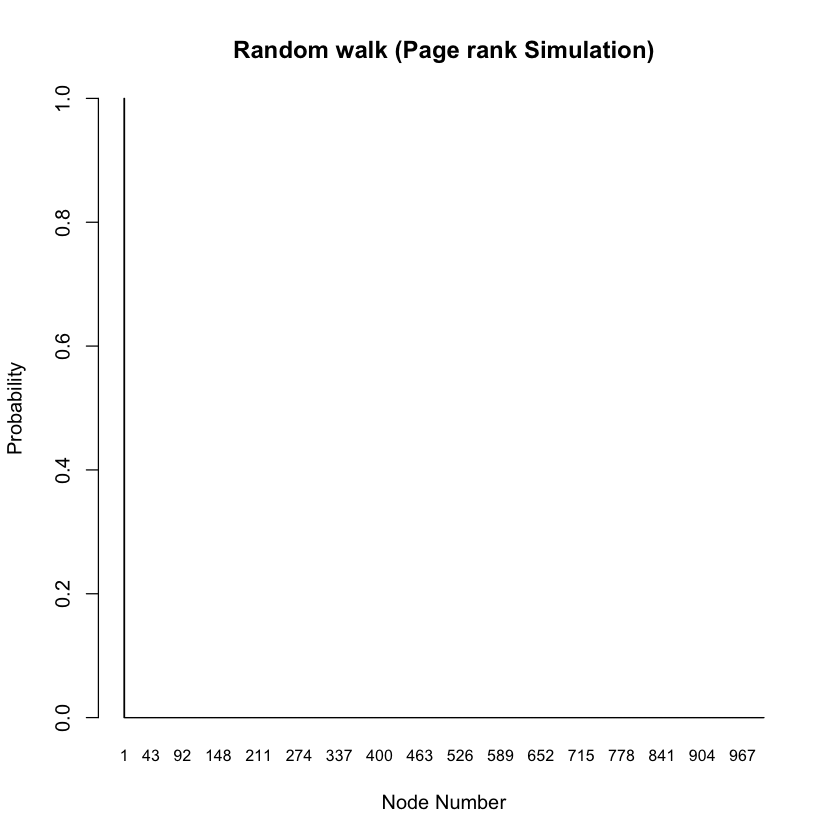

In [28]:
x = 1:1000
counts = integer(1000)
for(i in steady_state_node)
{
        counts[i] = counts[i] + 1
}
my_mat = matrix(c(x,counts/250), nrow = 1000,ncol = 2)
plot(my_mat, xlab = "Node number",ylab = "probability")
barplot(counts/250,main= "Random walk (Page rank Simulation)", xlab = "Node Number", ylab = "Probability"
       , names.arg= x, cex.names = 0.8,ylim=c(0, 1.0))

## Question 3(b)

In [48]:
#Function for random walk with teleportation
random_walk_modified = function (g, num_steps, start_node, transition_matrix = NULL, teleportation_Prob = 0){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        rand_num = sample(1:100,1)
        if(rand_num <= (teleportation_Prob*100))
            v = sample(1:vcount(g),1)
        else
            v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [49]:
steady_state_node = c()

for(i in sample.int(1000, size = 250)){
v_last = random_walk_modified(g,20,i, teleportation_Prob = 0.15)
steady_state_node = c(steady_state_node, v_last)
}
print(steady_state_node)

  [1]   1   1   1 940   1  57   3  17   1   1   1   1 842  13  88  39   6   1
 [19]   1   1   1 203   1   1   1   1   1   1   2   1   1 890   1 124 785   1
 [37]   1   1  48   1   3 443   2   2   1   1   1   1   1   1   1   1   1   1
 [55]   1   1   1   1   3   1 608   1   1   1   1 850 236 515  25   1   1   1
 [73]  23  88   1   1   1  57   1   1 192 510   1   1   1   1   1 364   2   1
 [91]   1   1 211   1   1  23  13   1   1   1   2   1   1   1   1   4   1   2
[109]   1   1   1 206   1   1   1   2   1   4   1  86   1   1 860   1   1   1
[127]  23   1   1 911   8   1   9   1   1   1   2   1   5   1   1   1   4 501
[145]   1   1 389 471   1   1   1   3   1   3   1   5   2  20   1  11   1   4
[163]   1 610  62   6 799   1   1   1   5   1 203   3  11   1   1   1   6   1
[181]   1   5   1 444  11   1   1   1   1 617   1   1   1  11   1   1   1   1
[199]   1   5 601 182   2   1   1   1 608   1  52   1   9   1 503   1   5 327
[217]   5 176 608   2   1   1   1 764   1   1 188 248   3   1   

  [1] 0.620 0.044 0.028 0.016 0.032 0.012 0.000 0.004 0.008 0.000 0.016 0.000
 [13] 0.008 0.000 0.000 0.000 0.004 0.000 0.000 0.004 0.000 0.000 0.012 0.000
 [25] 0.004 0.000 0.000 0.000 0.000 0.004 0.000 0.000 0.000 0.000 0.000 0.000
 [37] 0.000 0.000 0.004 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.004
 [49] 0.000 0.000 0.000 0.004 0.000 0.000 0.000 0.000 0.008 0.000 0.000 0.000
 [61] 0.000 0.004 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [73] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [85] 0.000 0.004 0.000 0.012 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [97] 0.000 0.000 0.000 0.000


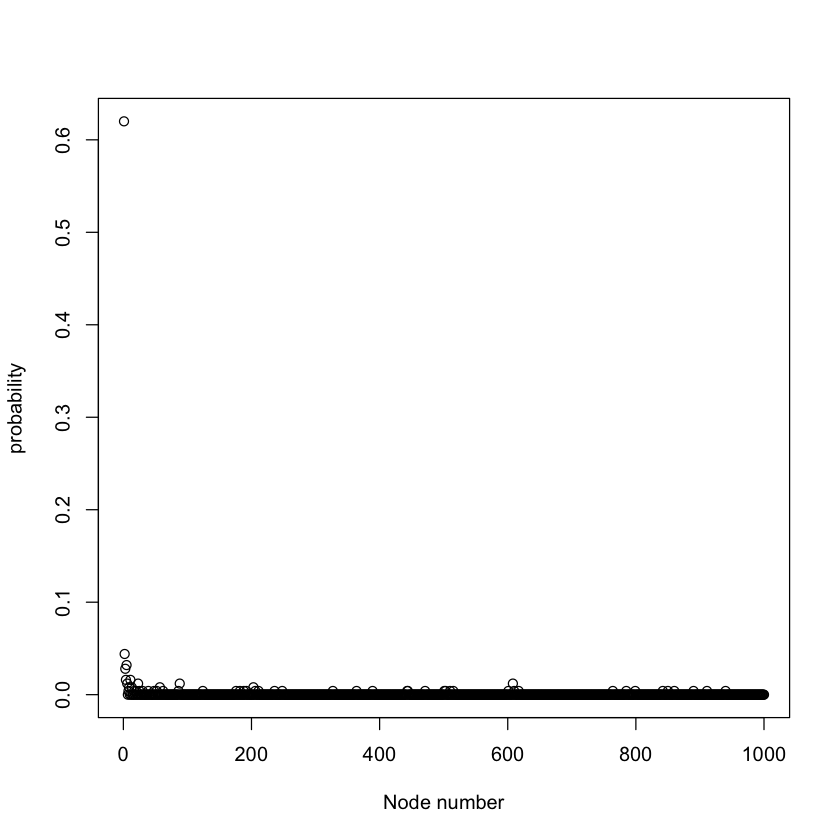

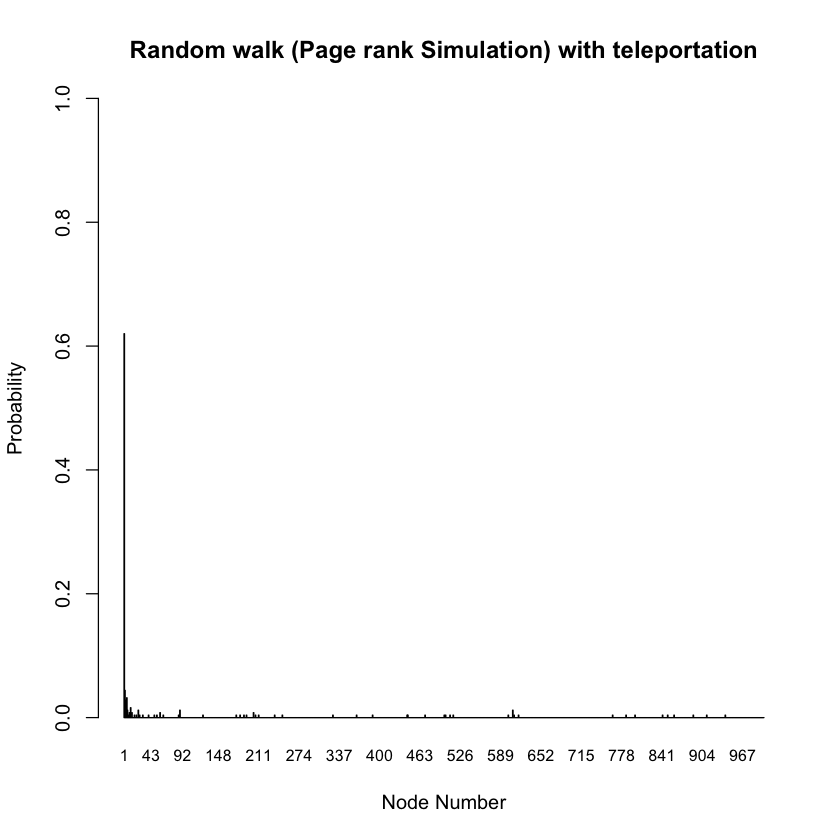

In [50]:
x = 1:1000
counts = integer(1000)
for(i in steady_state_node)
{
        counts[i] = counts[i] + 1
}
b3_prob = matrix(c(x,counts/250), nrow = 1000,ncol = 2)
print(b3_prob[, 2][1: 100])
plot(b3_prob, xlab = "Node number",ylab = "probability")
barplot(counts/250,main= "Random walk (Page rank Simulation) with teleportation", xlab = "Node Number", ylab = "Probability"
       , names.arg= x, cex.names = 0.8, ylim=c(0, 1.0))

## Question 4(a)

In [32]:
random_walk_4a = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
#         fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = 0.85 * transition_matrix[v, ] * my_mat[, 2] + 0.15 * my_mat[, 2]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [33]:
steady_state_node = c()

for(i in sample.int(1000, size = 250)){
    v_last = random_walk_4a(g,15,i)
    steady_state_node = c(steady_state_node, v_last)
}
print(steady_state_node)

  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


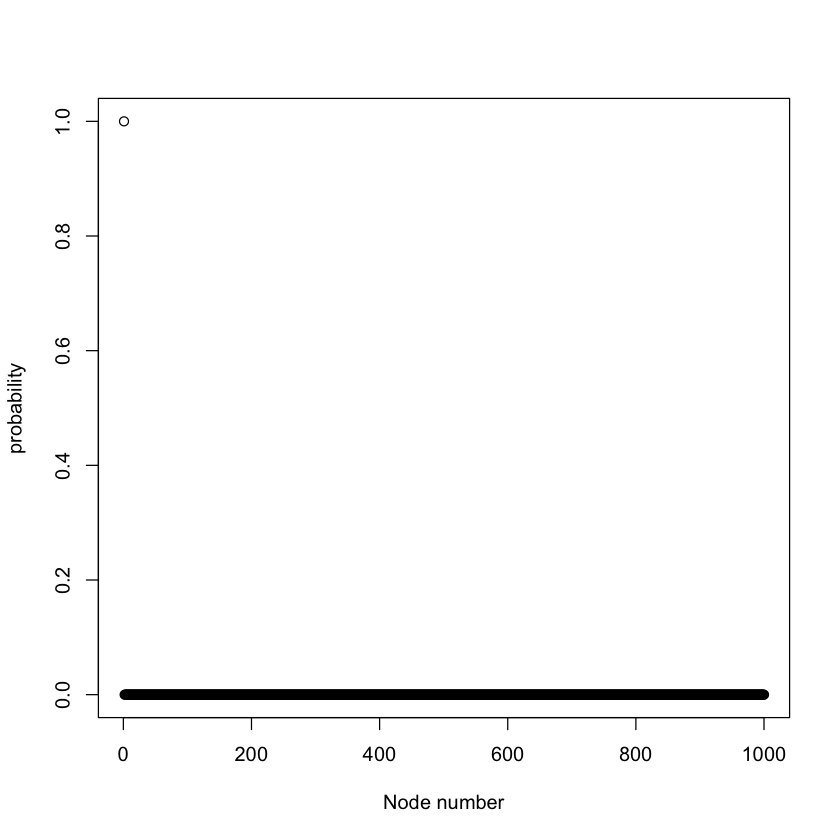

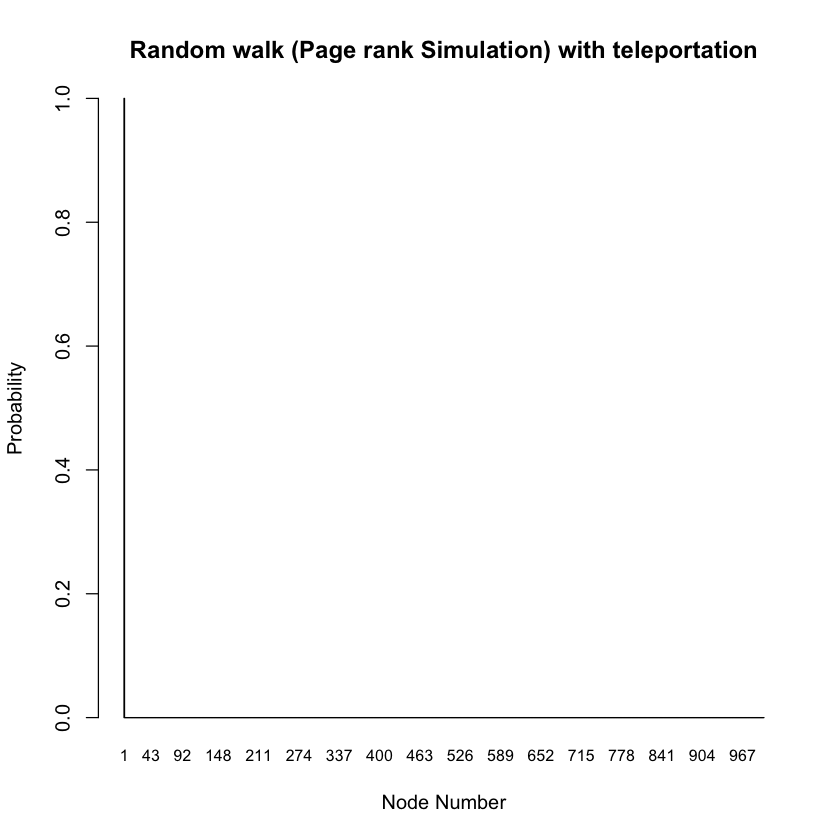

In [35]:
x = 1:1000
counts = integer(1000)
for(i in steady_state_node)
{
        counts[i] = counts[i] + 1
}
a4_prob = matrix(c(x,counts/250), nrow = 1000,ncol = 2)
# print(a4_prob)
# print(max(ppr_prob[, 2]))
plot(a4_prob, xlab = "Node number",ylab = "probability")
barplot(counts/250,main= "Random walk (Page rank Simulation) with teleportation", xlab = "Node Number", ylab = "Probability"
       , names.arg= x, cex.names = 0.8, ylim=c(0, 1.0))

## Question 4(b)

In [42]:
median_pr = matrix(0, 1000, 1)
median_pr[500] = 0.5
median_pr[501] = 0.5

random_walk_4b = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
#         fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = 0.85 * transition_matrix[v, ] * my_mat[, 2] + 0.15 * median_pr
        v = sample(1:vcount(g), 1, prob = PMF)
    }

    return(v)
}

In [43]:
steady_state_node = c()

for(i in sample.int(1000, size = 250)){
    v_last = random_walk_4b(g,15,i) 
    steady_state_node = c(steady_state_node, v_last)
}
print(steady_state_node)

  [1]   1 500 500 501   1   1   1   1   1   1   1   1   1 501   1   1 500   1
 [19]   1 500   1 501 500   1 501 500   1 500   1 500 501   1   1   1   1   1
 [37] 501   1   1 501 500   1 500   1   1 501   1   1 500   1   1   1   1   1
 [55]   1   1   1   1   1   1   1   1   1 501   1 500   1   1 500   1   1   1
 [73] 501 500   1   1   1 501 500   1   1 501 501   1 500   1   1   1   1   1
 [91]   1   1   1   1   1   1 500   1   1 501   1   1   1 501 501   1   1   1
[109] 501   1   1 500   1   1 500   1   1 501   1   1   1   1 500 501   1   1
[127]   1   1 500   1   1 501   1   1   1   1   1 500   1   1   1   1   1 500
[145]   1   1   1   1 501   1   1 500   1   1   1 500   1   1   1   1   1   1
[163] 501   1 500   1   1   1 500   1   1 501   1   1 500   1   1   1 501   1
[181] 501 500 501   1   1   1   1   1   1   1 500 500 501 501 500 500   1   1
[199]   1   1   1   1 501   1 500   1 501   1 501   1 500 500   1   1 500 501
[217]   1   1   1   1 501 501   1   1   1 500   1   1 500 500   

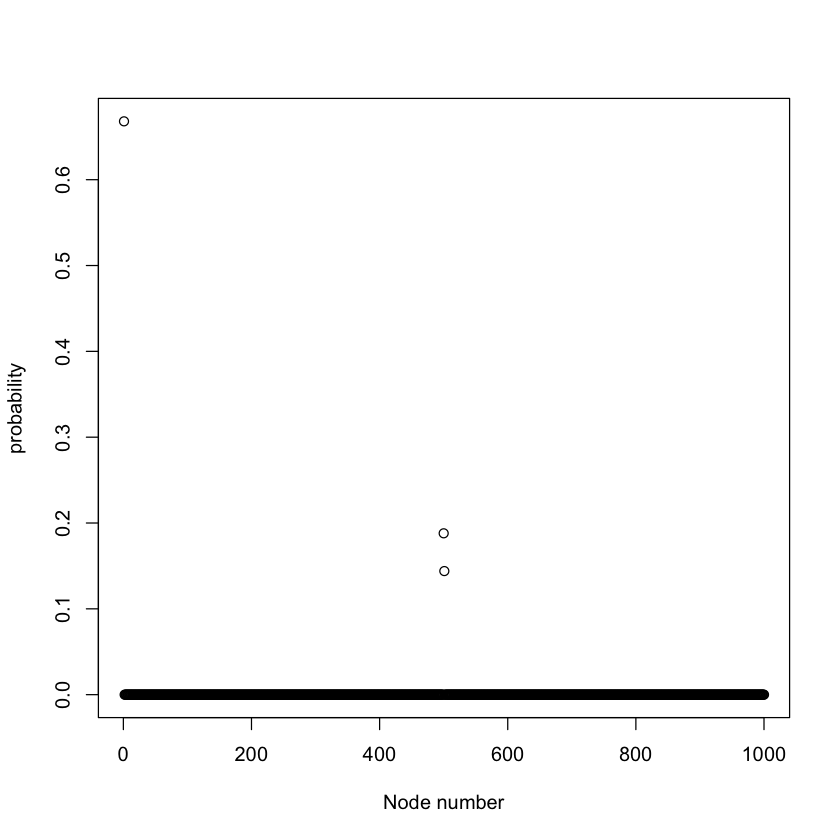

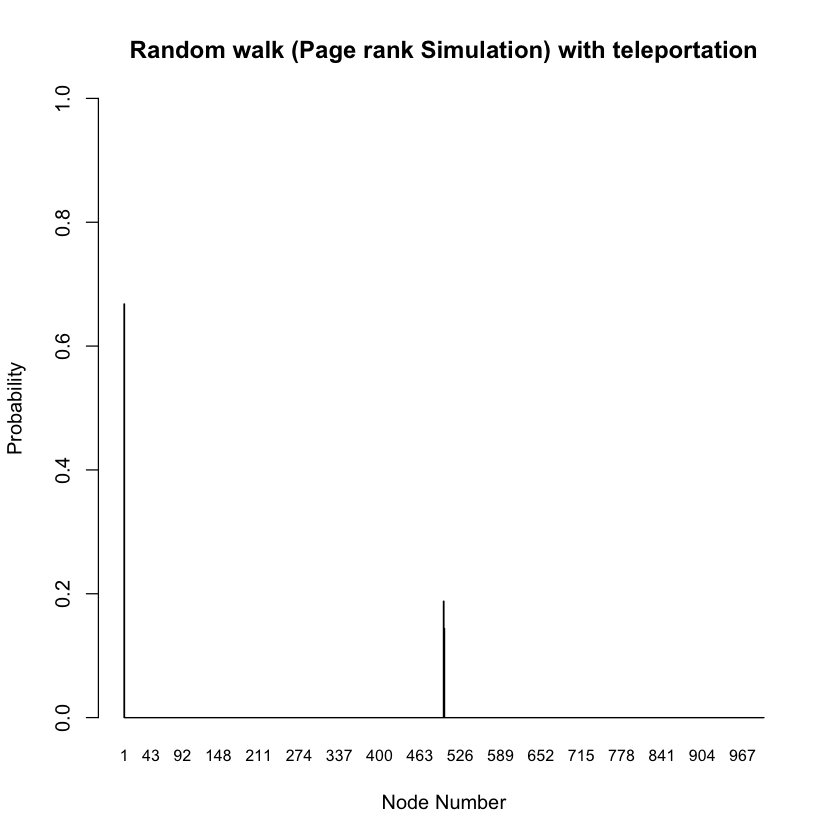

In [45]:
x = 1:1000
counts = integer(1000)
for(i in steady_state_node)
{
        counts[i] = counts[i] + 1
}
b4_prob = matrix(c(x,counts/250), nrow = 1000,ncol = 2)

# print(b4_prob)
plot(b4_prob, xlab = "Node number",ylab = "probability")

barplot(counts/250,main= "Random walk (Page rank Simulation) with teleportation", xlab = "Node Number", ylab = "Probability"
       , names.arg= x, cex.names = 0.8, ylim=c(0, 1.0))